In [1]:
import numpy as np
from scipy.fftpack import fft
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from pylab import *
#%matplotlib tk

from time import perf_counter

In [2]:
#Code with For Loop
def evalfreqfft(time_sec, vibr):
    datalength_fft = len(time_sec)
    datalengthby2 = int(datalength_fft/2)
    timeavgcalc = np.array([], dtype = float64)
    for i in np.arange(1,datalength_fft):
        timeavgcalc = (np.append(timeavgcalc,(time_sec[i]-time_sec[i-1])))
    sigint_avg = np.mean(timeavgcalc)
    siginf = 1/(datalength_fft*sigint_avg)
    freqhztemp = np.arange(0,datalength_fft,dtype = float64)
    freqhz = freqhztemp*siginf
    freqhz = freqhz[0:datalengthby2]
    vibr_fft = np.abs(fft(vibr,axis = -1))
    vibr_fft = ((vibr_fft[0:datalengthby2])/datalength_fft)*2
    return freqhz,vibr_fft, max(freqhz)*2

In [3]:
#Vectorised Code
def evalfreqfftvect(time_sec, vibr):
    datalength_fft = len(time_sec)
    datalengthby2 = int(datalength_fft/2)
    timeavgcalc = np.array([], dtype = float64)
    time_sec_i = np.delete(time_sec,len(time_sec)-1)
    time_sec_i_1 = np.delete(time_sec,0)
    timeavgcalc = time_sec_i_1- time_sec_i
    sigint_avg = np.mean(timeavgcalc)
    siginf = 1/(datalength_fft*sigint_avg)
    freqhztemp = np.arange(0,datalength_fft,dtype = float64)
    freqhz = freqhztemp*siginf
    freqhz = freqhz[0:datalengthby2]
    vibr_fft = np.abs(fft(vibr,axis = -1))
    vibr_fft = ((vibr_fft[0:datalengthby2])/datalength_fft)*2
    return freqhz,vibr_fft, max(freqhz)*2

In [4]:
#make a dummy time signal
time_sec = np.arange(0,1,0.00001)
len(time_sec)

100000

In [5]:
#make a dummy vibration signal
dummy_signal_1 = 5*np.sin(2*np.pi*50*time_sec)
dummy_signal_2 = 0.5*np.sin(2*np.pi*200*time_sec)
dummy_signal_1_2 = dummy_signal_1 + dummy_signal_2

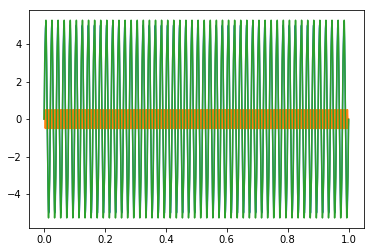

In [6]:
#plot the three dummy signals
plt.plot(time_sec,dummy_signal_1)
plt.plot(time_sec,dummy_signal_2)
plt.plot(time_sec,dummy_signal_1_2)
plt.show()

In [7]:
#Calculate the FFT of dummy signal with For Loop
start = perf_counter()
dummy_signal_freq_hz_f, dummy_signal_fft_f, dummy_signal_max_f = evalfreqfft(time_sec, dummy_signal_1_2)
duration = perf_counter()-start
print("For Loop took", duration, "seconds")

For Loop took 9.870200787314992 seconds


In [8]:
#Calculate the FFT of dummy signal with Vectorised Code
start2 = perf_counter()
dummy_signal_freq_hz_v, dummy_signal_fft_v, dummy_signal_max_v = evalfreqfftvect(time_sec, dummy_signal_1_2)
duration2 = perf_counter()-start2
print("Vectorised Code took", duration2, "seconds")

Vectorised Code took 0.03190018546619555 seconds


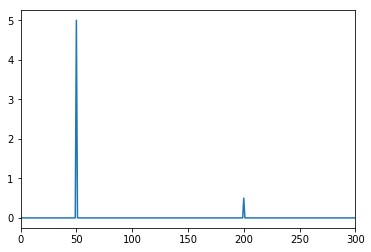

In [9]:
plt.plot(dummy_signal_freq_hz_f, dummy_signal_fft_f)
plt.xlim(0,300)
plt.show()

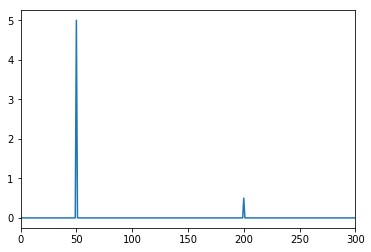

In [10]:
plt.plot(dummy_signal_freq_hz_v, dummy_signal_fft_v)
plt.xlim(0,300)
plt.show()

In [11]:
dummy_signal_freq_hz_f == dummy_signal_freq_hz_v

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [12]:
dummy_signal_fft_f == dummy_signal_fft_v

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)